<a href="https://colab.research.google.com/github/Taiba528/My-Python-World/blob/master/Food_inspection_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using  KERAS **TensorFlow** We are building a simple neural network with the goal of recognizing hand written digits.We will train the model and evaluate the results. We are working on the mnist dataset.


In [1]:
# Check Python Version
import sys
sys.version
sys.version_info
import platform
print(platform.python_version())
 

3.6.9


In [2]:
# Check Keras and Tensorflow environment
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

tensorflow: 1.15.0
keras: 2.2.5


Using TensorFlow backend.


## Importing necessary libraries

In [0]:
# import libraries
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## magic command to print multiple statements in one shot

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Importing and uploading mnist file in google colab.

The mnist data is a subset of a larger set available from NIST of handwritten digits 0-9, with 10,000 examples.In this, digits have been size-normalized and centered in a fixed-size images.It is a good database for pattern recognition methods.

In [7]:
from google.colab import files
uploaded=files.upload()


Saving Data_Train.csv to Data_Train.csv


## Reading file for the analysis

In [0]:
df = pd.read_csv("Data_Train.csv")

# Exploratory Data Anaysis(EDA)

In [10]:
#Explore Data
df.shape
type(df)
df.size
df.shape
df.head()
df.tail()

(147443, 6)

pandas.core.frame.DataFrame

884658

(147443, 6)

,ID,Type,Reason,SectionViolations,RiskLevel,Inspection_Results
0,3.110350e+13,RESTAURANT,CANVASS,33.0,High,4
1,1.008900e+13,GROCERY STORE,COMPLAINT,33.0,High,4
2,4.014900e+13,RESTAURANT,CANVASS,NaN,High,6
3,3.715770e+13,RESTAURANT,CANVASS RE-INSPECTION,31.0,Medium,4
4,4.747800e+13,RESTAURANT,COMPLAINT,30.0,High,4


,ID,Type,Reason,SectionViolations,RiskLevel,Inspection_Results
147438,3.261690e+13,GROCERY STORE,COMPLAINT,3.0,Medium,1
147439,3.833520e+13,RESTAURANT,SHORT FORM COMPLAINT,NaN,High,4
147440,4.269340e+13,RESTAURANT,CANVASS,NaN,Medium,6
147441,4.908700e+13,RESTAURANT,CANVASS RE-INSPECTION,3.0,High,5
147442,1.671460e+13,CHILDREN'S SERVICES FACILITY,LICENSE,32.0,High,4


In [11]:
print ('Overall data summary')
df.describe()
df.shape

Overall data summary


,ID,SectionViolations,Inspection_Results
count,1.474430e+05,108375.000000,147443.000000
mean,2.997142e+13,24.129153,3.680405
std,1.154808e+13,12.657456,1.481441
min,1.000010e+13,1.000000,0.000000
25%,1.994860e+13,14.000000,4.000000
50%,2.999150e+13,31.000000,4.000000
75%,3.995725e+13,33.000000,4.000000
max,4.999990e+13,70.000000,6.000000


(147443, 6)




```

### There are 147443 rows and 6 columns

In [13]:
#check for missing values
pd.isnull(df).any()
pd.isnull(df).sum()

ID                    False
Type                   True
Reason                False
SectionViolations      True
RiskLevel             False
Inspection_Results    False
dtype: bool

ID                        0
Type                   3485
Reason                    0
SectionViolations     39068
RiskLevel                 0
Inspection_Results        0
dtype: int64

In [0]:
df = df.dropna(how='any',axis=0) 

In [15]:
#check for missing values
pd.isnull(df).any()
pd.isnull(df).sum()

ID                    False
Type                  False
Reason                False
SectionViolations     False
RiskLevel             False
Inspection_Results    False
dtype: bool

ID                    0
Type                  0
Reason                0
SectionViolations     0
RiskLevel             0
Inspection_Results    0
dtype: int64

In [0]:
#dummy coading using the loop structure
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=pd.Categorical( df[col]).codes
        

In [17]:
df.head()

,ID,Type,Reason,SectionViolations,RiskLevel,Inspection_Results
0,3.110350e+13,278,0,33.0,0,4
1,1.008900e+13,157,2,33.0,0,4
3,3.715770e+13,278,1,31.0,2,4
4,4.747800e+13,278,2,30.0,0,4
5,2.523430e+13,278,0,18.0,0,1


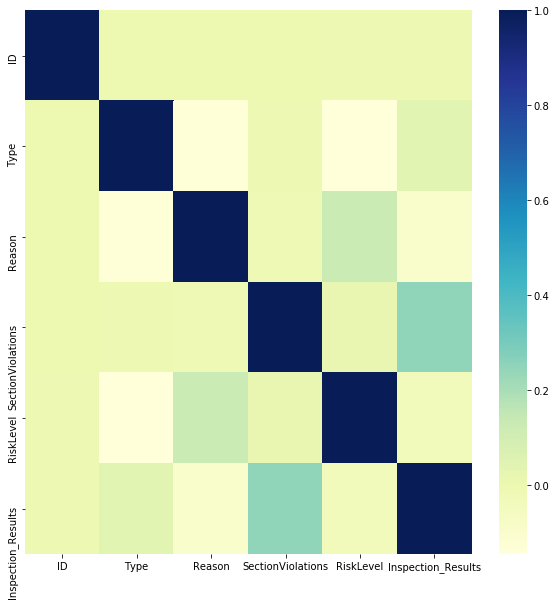

In [18]:
x = df.corr()
x
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap="YlGnBu")
plt.show();



In [23]:
df.groupby('Inspection_Results')


,ID,Type,Reason,SectionViolations,RiskLevel,Inspection_Results
0,3.110350e+13,278,0,33.0,0,4
1,1.008900e+13,157,2,33.0,0,4
3,3.715770e+13,278,1,31.0,2,4
4,4.747800e+13,278,2,30.0,0,4
5,2.523430e+13,278,0,18.0,0,1
6,1.764020e+13,278,1,32.0,0,4
13,1.096260e+13,278,0,16.0,0,1
14,2.633740e+13,278,2,2.0,0,5
17,2.538500e+13,278,0,18.0,0,1
18,4.726280e+13,278,0,21.0,0,5


In [0]:
x=df.drop('ID',axis=1)
x.head()

# Creating Features and Label

In [0]:
# Create Features and Labels 
X= x.drop('Inspection_Results',axis=1)
y=x['Inspection_Results']
X.head()
y.head()

In [0]:
X.head()

# Creating train and test data for model building & evaluation.


In [0]:
# Create train and test data 85% and 15% split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.15, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape


# Building Deep learning model 



*   The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. It allows us to build a model layer by layer. Each layer has weights that correspond to the layer the follows it.
*   We use the ‘add()’ function to add layers to our model. We will add 3-4 layers and an output layer.


*  Dropout works by probabilistically removing, or “dropping out,” inputs to a layer, which may be input variables in the data sample or activations from a previous layer. It has the effect of simulating a large number of networks with very different network structure and, in turn, making nodes in the network generally more robust to the inputs.






In [0]:
# Build Deep Learning Model
model = Sequential()
model.add(Dense(512, input_dim =4))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))


model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Activation('tanh'))

model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='Adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 



 In training process, we would like to minimise the loss function (difference between the neural network predictions and actual label values) and maximise the accuracy of the image prediction.
 

*   Dense is a standard layer type that works for most cases. In a dense layer, all nodes in the previous layer connect to the nodes in the current layer.

* Activation is the activation function for the layer. An activation function allows models to take into account nonlinear relationship.The activation function are using  rectified linear unit (ReLU)in first two layer,then tanh in next two layers and  softmax in the final layer ,as it is giving better accuracy.
 

*   In deep learning, we often use a technique called Cross entropy to define the loss.

*   Using sparse categorical cross entropy(used for integer target for multiclass problems) with 10 classes gives us a final output between 0-9, which is exactly what we need in mnist dataset.


*    Next, we need to compile our model. Compiling the model takes two parameters: optimizer and loss.
The optimizer controls the learning rate. We will be using ‘adagard’ as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.But in my adagard optimiver that is performing better.

The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.












## Here I am defining 5 layers
1st layer is input layer with 512 neurons and activation function is Relu.

2nd layer is hidden layer with 256 neurons and activation function is Relu.

3rd layer is hidden layer with 128 neurons and activation function is tanh.

4th layer is hidden layer with 100 neurons and activation function is tanh.

5th & final layer is output layer with 10 neurons and activation function is softmax.


# Fitting my model on training data

In [0]:
# Fit the model
model.fit(train_x,train_y, epochs=10, batch_size=32)

*   One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.As the number of epochs increases, more number of times the weight are changed in the neural network and the curve goes from underfitting to optimal to overfitting curve. Here I am asking my model to consider 10 epochs.so my completer dataset dataset is passed forward and backward through the neural network 10 times.

*   Since one epoch is too big to feed to the computer at once we divide it in several smaller batches.Here we are taking the batch size as 32.Smaller the batch size better the accuracy but it takes long time to run.







# Evaluating my model

In [0]:
# evaluate the model
scores = model.evaluate(test_x, test_y)
print("test model accuracy is\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

I am getting almost 100% accuracy on training data and 96.53% accuracy on test data.Hence we can say it's a preety good model

---



---



In [0]:
from sklearn import metrics
classes = model.predict_classes(test_x, batch_size=32, verbose=0)
print (classes.size)
print (metrics.accuracy_score(test_y, classes))
print ('Precision/Recall Metrics')
print (metrics.classification_report(test_y,classes))

## Precisio,recall,F1-score all are almost equal to 1,so we can conclude our model is a good classifier for multi class problem.

In [0]:
sample_row=1
sample_row=df.iloc[sample_row,:-1]
transfered_row=sample_row.values.reshape(5)

In [0]:
transfered_row

In [0]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
x_rus, y_rus, id_rus = rus.fit_sample(x,y)